<a href="https://colab.research.google.com/github/VicenteMercado/ADA-Informes/blob/main/Informe4_QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema del ordenamiento

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

![image](https://users.dcc.uchile.cl/~bebustos/apuntes/cc3001/Ordenacion/arbol-particion.gif)

Anteriormente, habíamos visto el teorema detrás del paradigma "*Divide y vencerás*" como método para la resolución de problemas y una demostración del cómo funciona a partir de su implementación en un algoritmo de ordenamiento (*MergeSort*). Ahora bien, este no es el único algoritmo de su clase que lo utiliza, como es el caso del **QuickSort**, creado por el científico británico en computación *Charles Anthony Richard Hoare* alrededor del año 1960.


#2. QuickSort



##2.1 Código.


El siguiente código muestra una implementación del algoritmo `QuickSort`.

In [ ]:
import random

opt = random.randint(1,3)
comp1 = 0 #Contador de comparaciones Partition con pivote al inicio
comp2 = 0 #Contador de comparaciones Partition con pivote al final
comp3 = 0 #Contador de comparaciones Partition con pivote como mediana de 3 elementos.

def medianOfThree(a,b,c,verbose):
  if(a <= b and b <= c):
    return b
  if(c <= b and b <= a):
    return b
  if(a <= c and c <= b):
    return c
  if(b <= c and c <= a):
    return c
  return a

def partitionMedian(arr,p,r,verbose):
  global comp3
  n1 = random.randint(p,r) #Se obtienen 3 índices al azar dentro del arreglo
  n2 = random.randint(p,r)
  n3 = random.randint(p,r)

  pivote = medianOfThree(arr[n1],arr[n2],arr[n3],verbose) #Se utilizan los datos en dichos índices para conseguir la mediana entre ellos.
  if(verbose == True): print(f"Se utilizan {arr[n1]}, {arr[n2]} y {arr[n3]}, la mediana es {pivote}")

  pivoteIndex = arr.index(pivote)
  arr[pivoteIndex], arr[p] = arr[p], arr[pivoteIndex] ; comp3 += 1 #Se intercambian los datos del pivote con los del primer elemento.
  if(verbose == True): print(f"Se intercambian datos del pivote con los de la primera posición ({arr[p]})")

  i = p + 1 #Puntero a la siguiente posición del primer elemento.
  for j in range(p, r+1):
      if arr[j] < pivote: #Elemento en j menor al del pivote, se intercambian los datos.
          if(verbose == True): print(f"Elemento en j = {arr[j]} menor al del pivote, se intercambian los datos.")
          aux = arr[j]
          arr[j] = arr[i]
          arr[i] = aux
          i += 1 ; comp3+=1
          if(verbose == True): print(arr)
      

  if(verbose == True): print(f"Se intercambian datos del índice puntero con los de la primera posición ({arr[p]})")
  arr[p], arr[i-1] = arr[i-1], arr[p]; comp3+=1 #Se intercambian los datos de la posición anterior a i y de p.
  if(verbose == True): print(arr)

  return i - 1 #Se retorna i-1 como pivote propuesto.

def partitionStart(arr,p,r,verbose):
  global comp1
  pivote = arr[p] #Pivote será el primer elemento del arreglo.
  if(verbose == True): print("Pivote al inicio del arreglo: ", pivote)
  i = p+1 # Puntero a la posición siguiente del primer elemento.
  j = r #Puntero al final del arreglo.
  
  while(i<=j):
    if(arr[i]<pivote): i+=1 #Elemento en i menor al del pivote, aumenta i.
    comp1+=1 
    if(arr[j]>pivote): j-=1 #Elemento en j mayor al del pivote, disminuye j.
    comp1+=1 
    if(i<=j): #Si i es menor o igual a j, se intercambian los datos en ambos índices.
      if(verbose == True): print(f"Se intercambian datos en i = {arr[i]} y j = {arr[j]}")
      arr[i],arr[j] = arr[j], arr[i] ; comp1 += 1
      if(verbose == True): print(arr)
  
  arr[p], arr[j] = arr[j], arr[p] ; comp1 += 1 #Se intercambian los datos en j con los del pivote.
  if(verbose == True): 
    print(f"Intercambio de dato en j = {arr[j]} con pivote")
    print(arr)
  return j #Se retorna j como pivote propuesto.

def partitionEnd(arr,p,r,verbose):
  global comp2
  pivote = arr[r] #Pivote será el elemento final del arreglo.
  if(verbose == True): print("Pivote al final del arreglo: ", pivote)
  topeIzq = p # Puntero al primer elemento para comparaciones.
  if(verbose == True): 
    print("Puntero al inicio del arreglo: ", arr[topeIzq])
    print("")

  for i in range(p,r):
    if(arr[i] <= pivote): #Si el elemento en i es menor o igual al del pivote, se intercambia con el valor del puntero.
      if(verbose == True): print(f"{arr[i]} menor que {pivote}, se produce cambio con {arr[topeIzq]}: ")
      arr[topeIzq],arr[i] = arr[i], arr[topeIzq] ;  comp2+=1
      if(verbose == True): print(arr)
      topeIzq +=1 #Aumenta el puntero para comparar en la siguiente posición.

  if(verbose == True): print(f"Intercambio de datos del índice ({arr[topeIzq]}) puntero con el del pivote: ")
  arr[topeIzq],arr[r] = arr[r],arr[topeIzq]; comp2 += 1 #Se intercambian los datos entre el puntero final y la última posición.
  if(verbose == True): print(arr)

  return topeIzq #Se retorna el puntero como pivote propuesto.

def quickSort(arr,p,r,verbose):
  global opt #Variable para definir tipo de Partition a ocupar.
  if len(arr) == 1:
        if(verbose == True): print("Se retorna arreglo de largo 1: ", arr)
        return arr #Se retorna arreglo de largo 1 (técnicamente ordenado de menor a mayor)
  if p < r:
        if(verbose == True): print("Se procede a buscar el pivote del arreglo.")
        if(opt == 1): q = partitionStart(arr,p, r, verbose) #Pivote al inicio
        if(opt == 2): q = partitionEnd(arr,p, r, verbose) #Pivote al final
        if(opt == 3): q = partitionMedian(arr,p,r, verbose) #Pivote como mediana de 3 elementos.
        
        if(verbose == True):
          print("") 
          print("Se ordena arreglo por la izquierda del pivote: ", arr[p:q-1])
        quickSort(arr,p, q-1, verbose)  # Ordenamiento de elementos por la izquierda
        if(verbose == True): print("Se ordena arreglo por la derecha del pivote: ", arr[q+1:r])
        quickSort(arr,q+1,r,verbose)  # Ordenamiento de elementos por la derecha.
  return arr

#Ejemplo
a = [5,8,4,2,10,9]
print("Input Array: ", a)
verb = False
a = quickSort(a, 0, len(a)-1,verb)
print("Output Array: ", a)
print("")
print("Comparaciones PartitionStart: ", comp1)
print("Comparaciones PartitionEnd: ", comp2)
print("Comparaciones PartitionMedian: ", comp3)

Input Array:  [5, 8, 4, 2, 10, 9]
Output Array:  [2, 4, 5, 8, 9, 10]

Comparaciones PartitionStart:  0
Comparaciones PartitionEnd:  0
Comparaciones PartitionMedian:  14


##2.2 Descripción del algoritmo

El algoritmo recibe como entrada una lista (o arreglo) $arr$ con la secuencia de $n$ elementos que se desean ordenar.

1. Para cada llamada recursiva, `quickSort` busca un pivote para la división del arreglo en dos particiones $arr[0,...,q-1]$ y $arr[q+1,...,n-1]$ con la función `partition`, la cual funciona de tres maneras distintas según el valor de `opt`, definido al azar dentro del rango de 1 a 3 en cada ejecución:

 * `opt == 1`, el pivote será siempre el elemento inicial del arreglo.
 * `opt == 2`, el pivote será siempre el elemento final del arreglo.
 * `opt == 3`, el pivote será la mediana de tres elementos del arreglo al azar.

 Luego de hallar el pivote, `quickSort` se llama a sí misma con cada partición del arreglo.

2. Si la partición resultante está compuesta de una sóla posición, entonces técnicamente está ordenada de menor a mayor, y por ende se retorna. En caso contrario, se repite el **paso 1**.

3. Finalmente y una vez ordenadas todas las particiones de menor a mayor, esto quiere decir por tanto que el arreglo original ya está ordenado de menor a mayor y, por tanto, se retorna.

$n$ será el tamaño del problema en cuestión.

Cuando la variable `verbose` es `True`, se muestra información por pantalla para ver lo que sucede paso a paso dentro de la función de una forma más explícita.

##2.3 Ejemplo

Tengamos en cuenta el siguiente arreglo:

* $x = [8, 4, 6, 2, 10]$

En primer lugar, se selecciona el pivote a partir del cual ordenarlo. Para este ejemplo, se eligirá el pivote como el elemento final del arreglo.

* $x = [8, 4, 6, 2, 10]$

$pivote = 10$

Partimos desde el primer elemento del arreglo como el tope por la izquierda, comparando los valores de las posiciones previas al pivote con el de este. Si dicho valor es menor o igual al del pivote, se intercambia con el tope izquierdo hallado hasta el momento y el índice aumenta.

* $x = [8 (i)(topeIzq), 4 , 6, 2, 10 (pivote)]$

* $x = [8, 4 (i)(topeIzq), 6, 2, 10 (pivote)]$

* $x = [8, 4, 6 (i)(topeIzq), 2, 10 (pivote)]$

* $x = [8, 4, 6, 2 (i)(topeIzq), 10 (pivote)]$

Luego, como el pivote es mayor a todas las demás posiciones, no se produce un intercambio y se dividen las particiones a partir del pivote.

* $x_a = [8, 4, 6, 2] ; x_b = []$

Como en este caso el arreglo $x_b$ es un arreglo vacío, técnicamente se encuentra ordenado de menor a mayor, por lo que se deja de lado por ahora.
Realizamos el mismo procedimiento descrito anteriormente con $x_a$.

* $x_a = [8, 4, 6, 2]$

$pivote = 2$

* $x_a = [8 (i)(topeIzq), 4, 6, 2 (pivote)]$

* $x_a = [8 (topeIzq), 4(i), 6, 2 (pivote)]$

* $x_a = [8 (topeIzq), 4, 6 (i), 2 (pivote)]$

Se intercambian los datos entre el tope izquierdo y el pivote y se generan las particiones.

* $x_a = [2, 4, 6]$ ; $x_b = []$

Finalmente y como la partición presente no vacía ya se encuentra ordenada, se dice por ende que tenemos nuestro arreglo $x$ ordenado de menor a mayor.

* $x = [2, 4, 6, 8, 10]$


##2.4 Ejecución del programa paso a paso.

Usando la opción `verbose = True`, se puede apreciar qué ocurre durante el proceso del algoritmo y sus llamadas recursivas. Con propósito de probar distintos casos, se utilizará un arreglo de tamaño $n = 5$, con elementos generados al azar en un rango del 1 al 100 cada uno.

In [ ]:
import random
a = random.sample(range(1, 100), 5)
print("Input array: ", a)
print("")
a = quickSort(a, 0, len(a)-1, verbose=True)
print("")
print("Output array: ", a)

Input array:  [15, 49, 93, 37, 7]

Se procede a buscar el pivote del arreglo.
Pivote al final del arreglo:  7
Puntero al inicio del arreglo:  15

Intercambio de datos del índice (15) puntero con el del pivote: 
[7, 49, 93, 37, 15]

Se ordena arreglo por la izquierda del pivote:  [7, 49, 93, 37]
Se ordena arreglo por la derecha del pivote:  [49, 93, 37]
Se procede a buscar el pivote del arreglo.
Pivote al final del arreglo:  15
Puntero al inicio del arreglo:  49

Intercambio de datos del índice (49) puntero con el del pivote: 
[7, 15, 93, 37, 49]

Se ordena arreglo por la izquierda del pivote:  []
Se ordena arreglo por la derecha del pivote:  [93, 37]
Se procede a buscar el pivote del arreglo.
Pivote al final del arreglo:  49
Puntero al inicio del arreglo:  93

37 menor que 49, se produce cambio con 93: 
[7, 15, 37, 93, 49]
Intercambio de datos del índice (93) puntero con el del pivote: 
[7, 15, 37, 49, 93]

Se ordena arreglo por la izquierda del pivote:  []
Se ordena arreglo por la der

#3. Tiempo de ejecución


##3.1 Teorema

El algoritmo `QuickSort` tiene un tiempo de ejecución de $O(n^2)$ **en su peor caso** y $O(nlog(n))$ **en su mejor caso**.


##3.2 Prueba del teorema (Método de sustitución/Teorema maestro)

1. Tomando en cuenta la implementación de `Partition` utilizada en el ejemplo anterior, el peor caso se lleva a cabo cuando el arreglo de entrada ya viene ordenado de menor a mayor.
La fórmula de recursión en este caso es:

$T(n) = T(0) + T(n-1) + O(n)$

Para resolver esta ecuación, se empleará el método de la **sustitución iterativa**, también conocido como *Plug and Chug*:


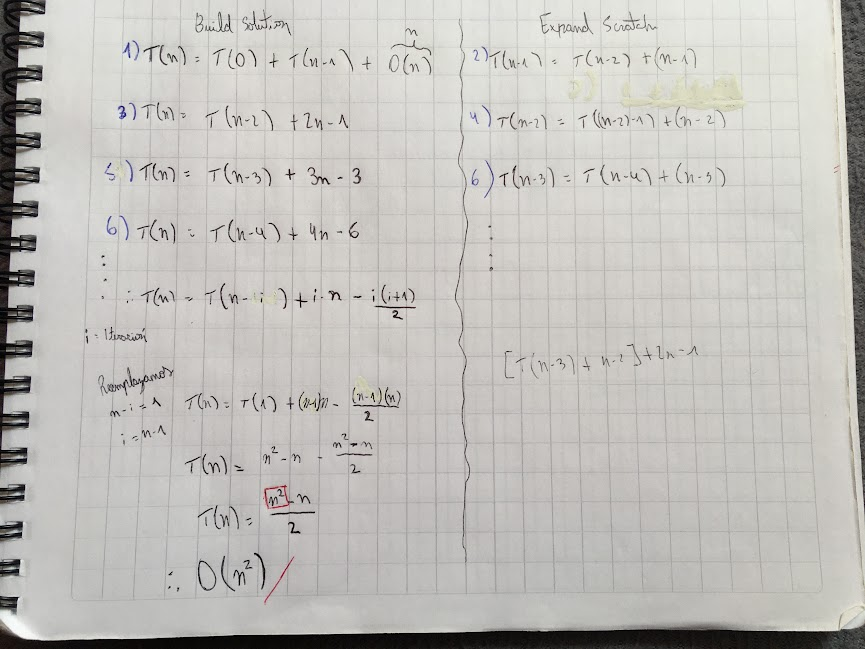

Gracias al desarrollo matemático de la expresión resultante de la sustitución iterativa, podemos concluir que el tiempo de ejecución para este caso es $O(n^2)$.


2. Para el mejor caso, este sucede cuando siempre se elige el elemento del medio del arreglo como pivote. La fórmula de recursión en este caso es:

$T(n) = 2T(n/2) + O(n)$

donde $a = 2, b = 2, d = 1$

![image](https://chartreuse-goal-d5c.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F6be820c4-964e-44c1-acbd-db888889e8df%2FUntitled.png?table=block&id=1f05807a-07c4-4bd5-a59a-4402523d7383&spaceId=4f8bebe4-a843-44d2-b6ee-51e2006a90d1&width=2000&userId=&cache=v2)

A través del uso del teorema maestro, podemos dar con la conclusión de que el tiempo de ejecución para este caso es $O(n log(n))$.

#4. Correctitud




##4.1 Teorema (Correctitud del algoritmo Partition)

*El algoritmo Partition recibe un arreglo A[0,...,n-1, lo reorganiza y retorna un índice q de tal forma que los elementos del arreglo $A[0,...,q-1]$ son menores o iguales a $A[q]$ y los elementos del arreglo $A[q+1,...,n-1]$ son mayores a $A[q]$*.

###Prueba del Teorema 1

Para probar la correctitud de este algoritmo, vamos a emplear la siguiente **propiedad de bucle invariante**:

> Al comienzo de cada iteración, se cumple para cualquier índice `k`entre `p` y `j`, con `p` el inicio del arreglo y `j` el final del mismo:
> * Entre $[p,...,i]$, los elementos son menores al pivote.
> * Entre $[i,...,j]$, los elementos son mayores o iguales al pivote.

**Inicialización**

Antes de la primera iteración $(m=1)$, se tiene que los arreglos $A[p,...,i]$ y $A[i,...,j]$ formados por `p`, `i` y `j` se encuentran vacíos, debido a que los tres índices se encuentran al inicio del arreglo. Esto es trivialmente cierto.

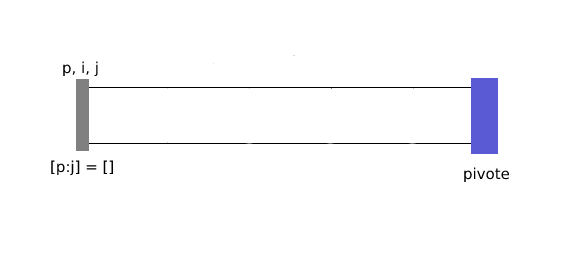
 
 
**Mantención**

Durante la m-ésima iteración, se va analizando y comparando el valor del arreglo en el índice `j` con el del pivote. Si dicho valor resulta ser menor o igual, se intercambian los valores de $A[j]$ y $A[i]$ en aquella instancia, y luego `i` y `j` aumentan de manera que se cumpla la condición de la propiedad. Si el valor es mayor al pivote, sólo aumenta `j` para evaluar la siguiente posición del arreglo.

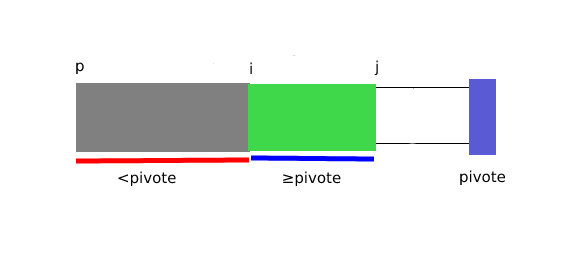

Esto sucede con cada m-iteración hasta llegar a la posición anterior al pivote, es decir, la penúltima posición del arreglo.

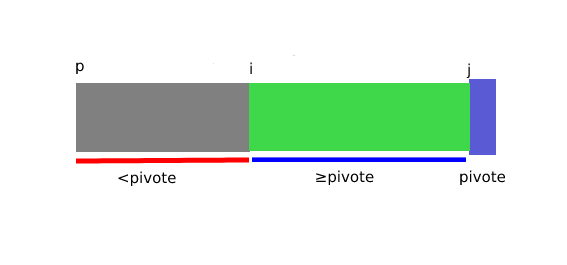

**Correctitud**

Tras verificar que la propiedad empleada se cumple tanto antes como durante la ejecución del ciclo, se puede afirmar que **Partition es correcto**.


##4.2 Teorema 2 (Correctitud del algoritmo QuickSort)

###Prueba del teorema 2

*El algoritmo QuickSort genera un arreglo:  $[a′1,a′2,...,a′n]$ , con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir, $a′1≤a′2≤...≤a′n$*.

Para probar la correctitud de `QuickSort`, vamos a emplear la siguiente hipótesis $P(n)$:

> $QuickSort$ retorna un arreglo con la secuencia de $n$ elementos de entrada ordenados de menor a mayor.

**Caso base $(n = 1)$**

Para este caso, al ver que nuestro arreglo contiene solamente un elemento, técnicamente ya se encuentra ordenado de menor a mayor y el algoritmo lo retorna, esto es trivialmente cierto.

**Caso inductivo $(m < n)$**

Para un arreglo $A$ de $n$ elementos, nuestro algoritmo busca su pivote `q` con la función `Partition`. Como en el teorema 1 se comprobó que `Partition` es correcta, esta siempre retornará el índice del pivote de forma que todo elemento en $A[0,...,q-1]$ sea menor a $A[q]$ y todo elemento en $A[q+1,...,n-1]$ mayor o igual al mismo.


Luego, `QuickSort` se llama a sí mismo con cada partición. Como el tamaño de estas particiones es menor a n, mediante inducción podemos deducir que son ordenados de manera correcta, comprobando así que **QuickSort es correcto**.

#5. Experimentos

##5.1 Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente,
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias.

Se tomarán en cuenta tamaños de problemas con $n \in [10,29]$.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre 1 y 100.

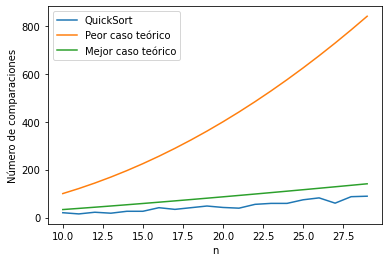

In [ ]:
import math
import matplotlib.pyplot as plt

opt = 2
x=[n for n in range(10,30)] #Caso promedio
y1=[(n**2) for n in range(10,30)] # Peor caso
y2=[(n * math.log2(n)) for n in range(10,30)] # Mejor caso
y=[]; 

for n in range(10,30):
  comp2 = 0
  a = random.sample(range(1, 100), n)
  a = quickSort(a,0,len(a)-1,verb)
  y.append(comp2)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["QuickSort", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

#Análisis de resultados

Como podemos ver y era de esperarse, la curva del mejor caso muestra un comportamiento de crecimiento logarítmico conforme aumenta el tamaño $n$ del arreglo, mientras que el peor caso crece de manera cuadrática.

No obstante, nótese cómo la curva del caso promedio está incluso por debajo de la del mejor. Posiblemente esto se deba a la naturaleza aleatoria de tanto el arreglo en sí, como el de su pivote (podría ser o no el mayor elemento), por lo que el algoritmo no sigue un patrón estricto de ordenamiento como lo harían otros algoritmos con la misma finalidad, sino que más bien es arbitrario.

##5.2 Tiempo de ejecución (QuickSort vs MergeSort)

El siguiente gráfico mostrará la comparación de tiempos de ejecución del algoritmo `QuickSort` frente al de `MergeSort`, en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 5 y 500.

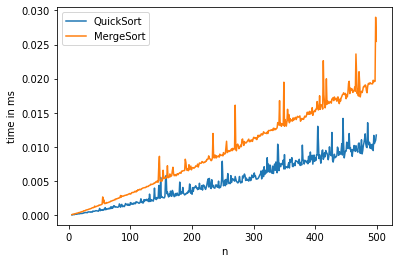

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

recCalls = 0 #Contador de llamadas recursivas de mergeSort a sí misma.
comp = 0 #Contador de comparaciones de subarreglos en merge.

def mergeSort(arr, verbose = False):
  global recCalls
  length = len(arr) #Largo de arreglo
  if length == 1:
    if verbose == True:
      print("Se retorna arreglo de una sola posición, ", arr)
    return arr
  
  if length > 1:
  
    mid = length // 2 #Posicion media del arreglo.

    recCalls+=1
    if verbose == True: print("Se divide el arreglo: ", arr[:mid], arr[mid:])
    particion_izq = mergeSort(arr[:mid], verbose)
    recCalls+=1
    particion_der = mergeSort(arr[mid:], verbose)

    arr_nuevo = merge(particion_izq, particion_der, verbose)
    return arr_nuevo

def merge(izq, der, verbose = False):
  ordenado = [] #Arreglo que contiene a los subarreglos de entrada mezclados y ordenados de menor a mayor.
  i = k = 0 
  global comp
  
  if verbose == True: 
    print("")
    print("Se procede a mezclar y ordenar subarreglos.")
  while i < len(izq) and k < len(der):
    if izq[i] < der[k]:
      ordenado.append(izq[i])
      i+=1
    else:
      ordenado.append(der[k])
      k+=1
    comp+=1
  
  if i >= len(izq) and k < len(der): #Casos de arreglos restantes.
    while(k < len(der)):
      ordenado.append(der[k])
      k+=1
      comp+=1
  else:
    while(i < len(izq)):
      ordenado.append(izq[i])
      i+=1
      comp+=1

  if verbose == True: print(ordenado)

  return ordenado

x1=[]; x2=[];y1=[]; y2=[]

for n in range(5,500):

  a = random.sample(range(-500, 500), n)

  #la función repeat está ejecutando 20 veces maxSubArray con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a},{0},{len(a)-1},{verb})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

for n in range(5,500):

  arr = random.sample(range(-500, 500), n)

  #la función repeat está ejecutando 20 veces maxSubArrayKadane con el arreglo arr y retorna el mejor tiempo obtenido.
  time = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({arr})", repeat=1, number=10)

  x2.append(n)
  y2.append(time)


plt.plot(x1,y1)
plt.plot(x2,y2)
plt.legend(["QuickSort", "MergeSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

#Análisis de resultados

Como se puede ver en la gráfica y pese a que en ciertas instancias sean muy cercanas, la curva de tiempo de QuickSort indica que es generalmente más rapido que el algoritmo de MergeSort.

Esto es debido principalmente a la implementación en cada caso. Mientras MergeSort funciona de manera que se generan subarreglos los cuales se toman sus propios arreglos **(poseen sus propios tiempos de ejecución)** para luego ser unidos y ordenados, QuickSort trabaja únicamente sobre el arreglo original, creando particiones que se toman como secciones del mismo y utilizando punteros para recorrerlos. 

##5.3 Tiempo de ejecución (Pivote inicio vs final vs mediana)

El siguiente gráfico mostrará la comparación de tiempos de ejecución del algoritmo `QuickSort`, con su función `Partition` implementada de tres distintas formas:

* Seleccionando como pivote el primer elemento del arreglo.
* Seleccionando como pivote el último elemento del arreglo.
* Seleccionando como pivote la mediana de tres elementos al azar del arreglo.

Todo esto, en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 5 y 500.

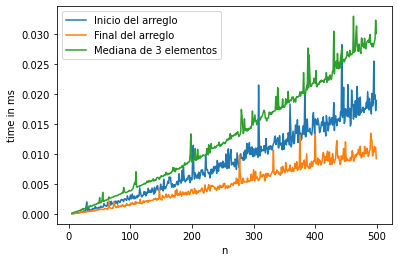

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x1=[] 
x2=[]
y1=[] 
y2=[]
x3=[]
y3=[]

for n in range(5,500): #Pivotes es inicio del arreglo
  opt = 1
  a = random.sample(range(-500, 500), n)

  #la función repeat está ejecutando 20 veces maxSubArray con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a},{0},{len(a)-1},{verb})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

for n in range(5,500): #Pivote es final del arreglo
  opt = 2
  a = random.sample(range(-500, 500), n)

  #la función repeat está ejecutando 20 veces maxSubArray con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a},{0},{len(a)-1},{verb})", repeat=1, number=10)

  x2.append(n)
  y2.append(t)

for n in range(5,500): #Pivote es la mediana de 3 elementos
  opt = 3

  a = random.sample(range(-500, 500), n)

  #la función repeat está ejecutando 20 veces maxSubArray con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a},{0},{len(a)-1},{verb})", repeat=1, number=10)

  x3.append(n)
  y3.append(t)



plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.legend(["Inicio del arreglo", "Final del arreglo", "Mediana de 3 elementos"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

#Analisis de resultados

Por lo visto a partir de la gráfica, podemos apreciar que la selección del pivote como la mediana de 3 elementos del arreglo al azar posee el peor rendimiento en general, principalmente por la función adicional de hallar la mediana que conlleva, lo cual implica un mayor tiempo de ejecución.

Por otro lado, los casos del pivote como el inicio y el final del arreglo (respectivamente) poseen los mejores tiempos de ejecución, con el último como el más rápido. Posiblemente esto se debe a las diferencias de implementación de algoritmo entre ambos casos, lo cual genera una cierta desigualdad entre tiempos de ejecución.